# Can Deep Reinforcement Learning Solve Erdos-Selfridge-Spencer Games?

In [1]:
import logging, os

logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines.results_plotter import load_results, ts2xy

from defense import Defense
from attack import Attack
from utils import extract_results, simulate_trainedAttackerDefender

log_dir_def = "/tmp/gym/"
log_dir_att = "/tmp/gym_attack/" 

## Defense

Model Initialized !
PPO LEARNING DONE DEFENSE
Model Initialized !
999 timesteps
Best mean reward: -inf - Last mean reward per episode: -0.66
1993 timesteps
Best mean reward: -0.66 - Last mean reward per episode: 0.86
2992 timesteps
Best mean reward: 0.86 - Last mean reward per episode: 0.96
3992 timesteps
Best mean reward: 0.96 - Last mean reward per episode: 0.94
4999 timesteps
Best mean reward: 0.96 - Last mean reward per episode: 0.92
5996 timesteps
Best mean reward: 0.96 - Last mean reward per episode: 0.86
6992 timesteps
Best mean reward: 0.96 - Last mean reward per episode: 0.96
7994 timesteps
Best mean reward: 0.96 - Last mean reward per episode: 0.90
8995 timesteps
Best mean reward: 0.96 - Last mean reward per episode: 0.96
9998 timesteps
Best mean reward: 0.96 - Last mean reward per episode: 0.88
DQN LEARNING DONE DEFENSE
Model Initialized !
4994 timesteps
Best mean reward: -inf - Last mean reward per episode: 0.04
9997 timesteps
Best mean reward: 0.04 - Last mean reward per e

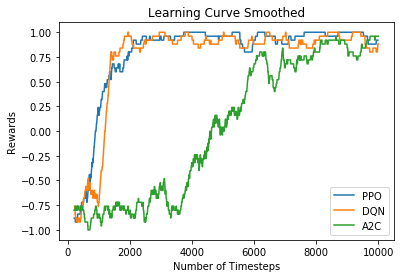

In [2]:
nb_episode_train = 10000

defense1 = Defense('PPO', K=10, P=0.9, adverse_set_prob=0.0, disj_supp_prob=0.0)

defense1.learn(nb_episode_train)
x1, y1 = extract_results(log_dir_def)


defense2 = Defense('DQN', K=10, P=0.9, adverse_set_prob=0.0, disj_supp_prob=0.0)

defense2.learn(nb_episode_train)
x2, y2 = extract_results(log_dir_def)

defense3 = Defense('A2C', K=10, P=0.9, adverse_set_prob=0.0, disj_supp_prob=0.0)

defense3.learn(nb_episode_train)
x3, y3 = extract_results(log_dir_def)

plt.figure()
plt.plot(x1, y1, label='PPO')
plt.plot(x2, y2, label='DQN')
plt.plot(x3, y3, label='A2C')
plt.xlabel('Number of Timesteps')
plt.ylabel('Rewards')
plt.title("Learning Curve Smoothed")
plt.savefig('im6.png')
plt.legend()
plt.show()

Defender turn..
Defender keeps: [0 0 0 0 0]


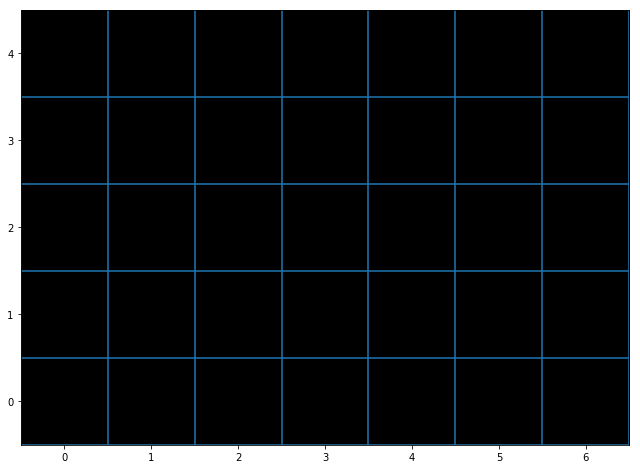

Defender wins!!


In [2]:
nb_episode_train = 10000

defense = Defense('DQN', K=4, P=0.9, adverse_set_prob=0.0, disj_supp_prob=0.0)

defense.learn(nb_episode_train)
defense.simulate_trainedDefender()

Episode 0#; 	 Nb of steps: 5; 	 Reward: [1.].


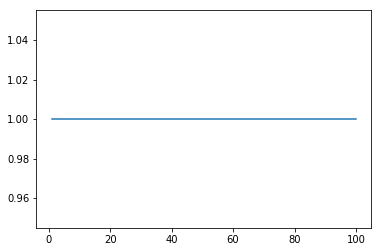

In [3]:
defense.run(100)
plt.plot(range(1, defense.nb_episodes+1), defense.reward)
plt.show()

## Attack 

Model Initialized !
PPO LEARNING DONE ATTACK
Model Initialized !
999 timesteps
Best mean reward: -inf - Last mean reward per episode: -0.98
1999 timesteps
Best mean reward: -0.98 - Last mean reward per episode: 0.90
2998 timesteps
Best mean reward: 0.90 - Last mean reward per episode: 0.96
3998 timesteps
Best mean reward: 0.96 - Last mean reward per episode: 0.90
4998 timesteps
Best mean reward: 0.96 - Last mean reward per episode: 0.88
5998 timesteps
Best mean reward: 0.96 - Last mean reward per episode: 0.88
6997 timesteps
Best mean reward: 0.96 - Last mean reward per episode: 0.92
7999 timesteps
Best mean reward: 0.96 - Last mean reward per episode: 0.92
8999 timesteps
Best mean reward: 0.96 - Last mean reward per episode: 0.92
9998 timesteps
Best mean reward: 0.96 - Last mean reward per episode: 0.88
DQN LEARNING DONE ATTACK
Model Initialized !
4999 timesteps
Best mean reward: -inf - Last mean reward per episode: -0.58
9999 timesteps
Best mean reward: -0.58 - Last mean reward per e

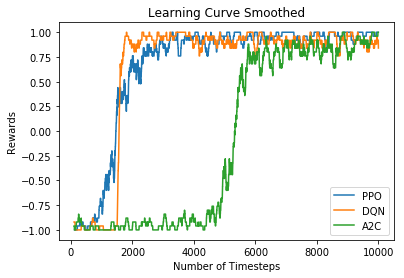

In [5]:
nb_episode_train = 10000

attack = Attack('PPO', K=10, P=1.4)

attack.learn(nb_episode_train)
x1, y1 = extract_results(log_dir_att)


attack = Attack('DQN', K=10, P=1.4)

attack.learn(nb_episode_train)
x2, y2 = extract_results(log_dir_att)

attack = Attack('A2C', K=10, P=1.4)

attack.learn(nb_episode_train)
x3, y3 = extract_results(log_dir_att)

plt.figure()
plt.plot(x1, y1, label='PPO')
plt.plot(x2, y2, label='DQN')
plt.plot(x3, y3, label='A2C')
plt.xlabel('Number of Timesteps')
plt.ylabel('Rewards')
plt.title("Learning Curve Smoothed")
plt.legend()
plt.show()

Defender turn..
Defender keeps: [0 0 0 0 0 0 0 0 0 1 0]


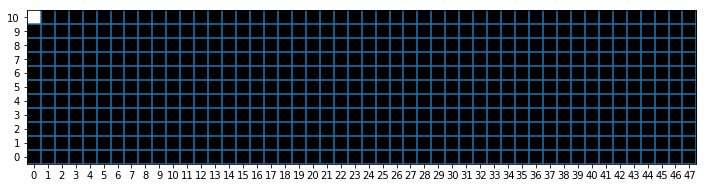

Attacker wins!!


In [6]:
attack.simulate_trainedAttacker()

Episode 0#; 	 Nb of steps: 3; 	 Reward: [1.].


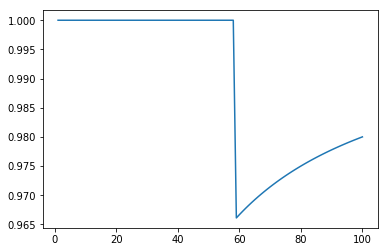

In [8]:
attack.run(100)
plt.plot(range(1, attack.nb_episodes+1), attack.reward)
plt.show()

## Trained AttackerDefender

In [9]:
nb_episode_train = 10000

defense = Defense('DQN', K=10, P=0.7, adverse_set_prob=0.0, disj_supp_prob=0.0)
defense.learn(nb_episode_train)

attack = Attack('DQN', K=10, P=1.4)
attack.learn(nb_episode_train)

Model Initialized !
996 timesteps
Best mean reward: -inf - Last mean reward per episode: -0.28
1997 timesteps
Best mean reward: -0.28 - Last mean reward per episode: 0.92
2999 timesteps
Best mean reward: 0.92 - Last mean reward per episode: 1.00
3998 timesteps
Best mean reward: 1.00 - Last mean reward per episode: 0.98
4995 timesteps
Best mean reward: 1.00 - Last mean reward per episode: 1.00
5996 timesteps
Best mean reward: 1.00 - Last mean reward per episode: 0.96
6996 timesteps
Best mean reward: 1.00 - Last mean reward per episode: 1.00
7997 timesteps
Best mean reward: 1.00 - Last mean reward per episode: 0.96
8999 timesteps
Best mean reward: 1.00 - Last mean reward per episode: 0.98
9999 timesteps
Best mean reward: 1.00 - Last mean reward per episode: 1.00
DQN LEARNING DONE DEFENSE
Model Initialized !
998 timesteps
Best mean reward: -inf - Last mean reward per episode: -0.10
1996 timesteps
Best mean reward: -0.10 - Last mean reward per episode: 0.38
2998 timesteps
Best mean reward:

Defender turn..
Defender keeps: [0 0 0 0 0 0 0 0 0 0 0]


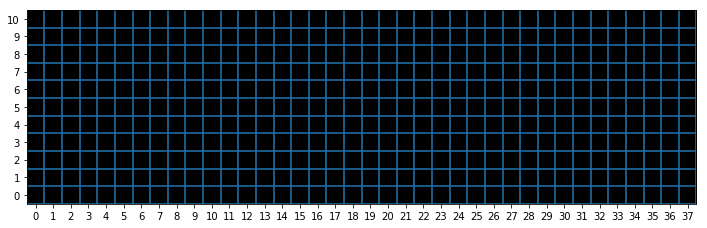

Defender wins!!


In [10]:
simulate_trainedAttackerDefender(attack, defense, 0.5)